In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
#Obtencion de los datasets para modificaciones y vizualicaciones
a = pd.read_parquet('train.parquet')
o = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

In [ ]:
#Conocer valores y visualizar datos clave
a.describe()

In [ ]:
a.info()

In [ ]:
var = a[['sqfeet','baths','beds','comes_furnished','price']]
sns.pairplot(var)

In [161]:
#Agregar columna 'category_price'
a.insert(5,'category_price',np.nan)

In [ ]:
#Modificar valores dependiendo de otra variable
a['category_price'][(a['price'] >= 0) & (a['price'] < 1000)] = 'low'
a['category_price'][(a['price'] >= 1000) & (a['price'] < 2000)] = 'medium'
a['category_price'][a['price'] >= 2000] = 'high'

In [163]:
#Modificar valores outliners de 
a.drop(a['sqfeet'][a['sqfeet'] > 15000].index, inplace= True)
a.drop(a['baths'][a['baths'] > 6].index, inplace= True)
a.drop(a['beds'][a['beds'] == 0].index, inplace= True)

In [164]:
a.drop(a['price'][a['price'] > 6000].index, inplace= True)

In [ ]:
#Vizualisacion de correralcion entre variables
corr = a.corr()
corr.style.background_gradient(cmap= 'coolwarm')

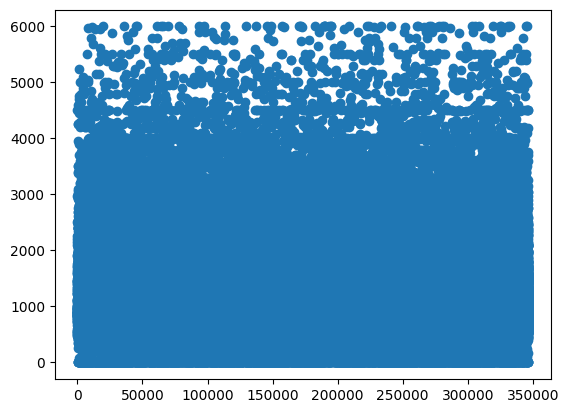

In [166]:
#ilustrar la distribucion poblacional para tener mayor informacion sobre esta 
plt.scatter(a.index,a['price'])

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [168]:
#Sacar las variables independientes y dependientes para el aprendizaje
x_t = a[['sqfeet','baths','beds','comes_furnished']]
y_t = a['category_price']

In [ ]:
lr = LogisticRegression()
lr.fit(x_t, y_t)

In [170]:
#Variables prueba
prueba = test[['sqfeet','baths','beds','comes_furnished']]

In [171]:
lr = pd.DataFrame(lr.predict(prueba))

In [172]:
#Cambiar el nombre de columna y exportar archivo
lr.columns =['pred']
#lr.to_csv('zKyro21.csv',index= False)